# <h1><font size="6">Santander EDA and Prediction</font></h1>
https://www.kaggle.com/competitions/santander-customer-transaction-prediction/overview/description

<br>

# <a id='0'>Content</a>

- <a href='#1'>Introduction</a>  
- <a href='#2'>Prepare the data analysis</a>  
- <a href='#3'>Data exploration</a>   
- <a href='#4'>Model</a>
- <a href='#5'>Submission</a>

# <a id = '1'> Introduction</a>

In this challenge, we invite Kagglers to help us identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data we have available to solve this problem.


這是一個匿名的資料集，包含了三種類型的變數:
- target : 0或1的二進位變數
- ID_code : 字串類型的客戶編號
- var_0~var_199 : 數字類型的變數

任務是將利用test資料集的數字變數預測

檔案描述:
- train.csv - 訓練模型用的數據
- test.csv - 導入模型預測的數據
- sample_submission.csv - 輸出預測結果的格式範本



In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.style.use('ggplot')

import warnings

warnings.filterwarnings("ignore")

# <a id='2'>Prepare for data analysis</a>  

## Train

In [2]:
train = pd.read_csv('./train.csv')

print(train.shape) 

(200000, 202)


In [3]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
train.isna().sum().sum() #資料是否有缺失值

0

In [5]:
train.describe().T.head() 

,count,mean,std,min,25%,50%,75%,max
target,200000.0,0.100490,0.300653,0.0000,0.000000,0.00000,0.000000,1.0000
var_0,200000.0,10.679914,3.040051,0.4084,8.453850,10.52475,12.758200,20.3150
var_1,200000.0,-1.627622,4.050044,-15.0434,-4.740025,-1.60805,1.358625,10.3768
var_2,200000.0,10.715192,2.640894,2.1171,8.722475,10.58000,12.516700,19.3530
var_3,200000.0,6.796529,2.043319,-0.0402,5.254075,6.82500,8.324100,13.1883


## Test

In [6]:
test = pd.read_csv('./test.csv', usecols = range(201)) 

print(test.shape) 

(200000, 201)


In [7]:
test.head() 

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [8]:
test.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
var_0,200000.0,10.658737,3.036716,0.1887,8.442975,10.51380,12.739600,22.3234
var_1,200000.0,-1.624244,4.040509,-15.0434,-4.700125,-1.59050,1.343400,9.3851
var_2,200000.0,10.707452,2.633888,2.3552,8.735600,10.56070,12.495025,18.7141
var_3,200000.0,6.788214,2.052724,-0.0224,5.230500,6.82235,8.327600,13.1420
var_4,200000.0,11.076399,1.616456,5.4844,9.891075,11.09975,12.253400,16.0371


# <a id='3'>Data exploration</a>

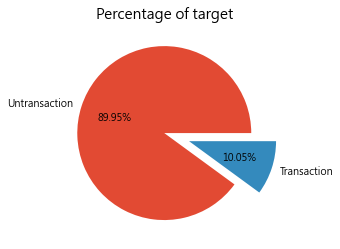

In [9]:
#target的圓餅圖

plt.pie(train['target'].value_counts(),explode=[0,0.3], autopct = '%.2f%%', labels = ['Untransaction', 'Transaction'])

plt.title('Percentage of target') 

plt.show() 

**可以觀察出此資料集屬於不平衡資料**，後面在使用機器學習方法時，需要resample訓練資料，避免把minority class當作資料雜訊。

此資料為匿名資料，我們無法得知各變數所代表的意義，因此必須確認各變數在訓練與測試資料中是否有相同PDF。

In [10]:
#畫出機率密度函數圖(PDF)

def plot_feature_distribution(df1, df2, label1, label2, features):
    
    i = 0
    
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        
        plt.subplot(10,10,i)
        
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        
        plt.xlabel(feature, fontsize=9)
        plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
        
        plt.legend()
    plt.show();

<Figure size 432x288 with 0 Axes>

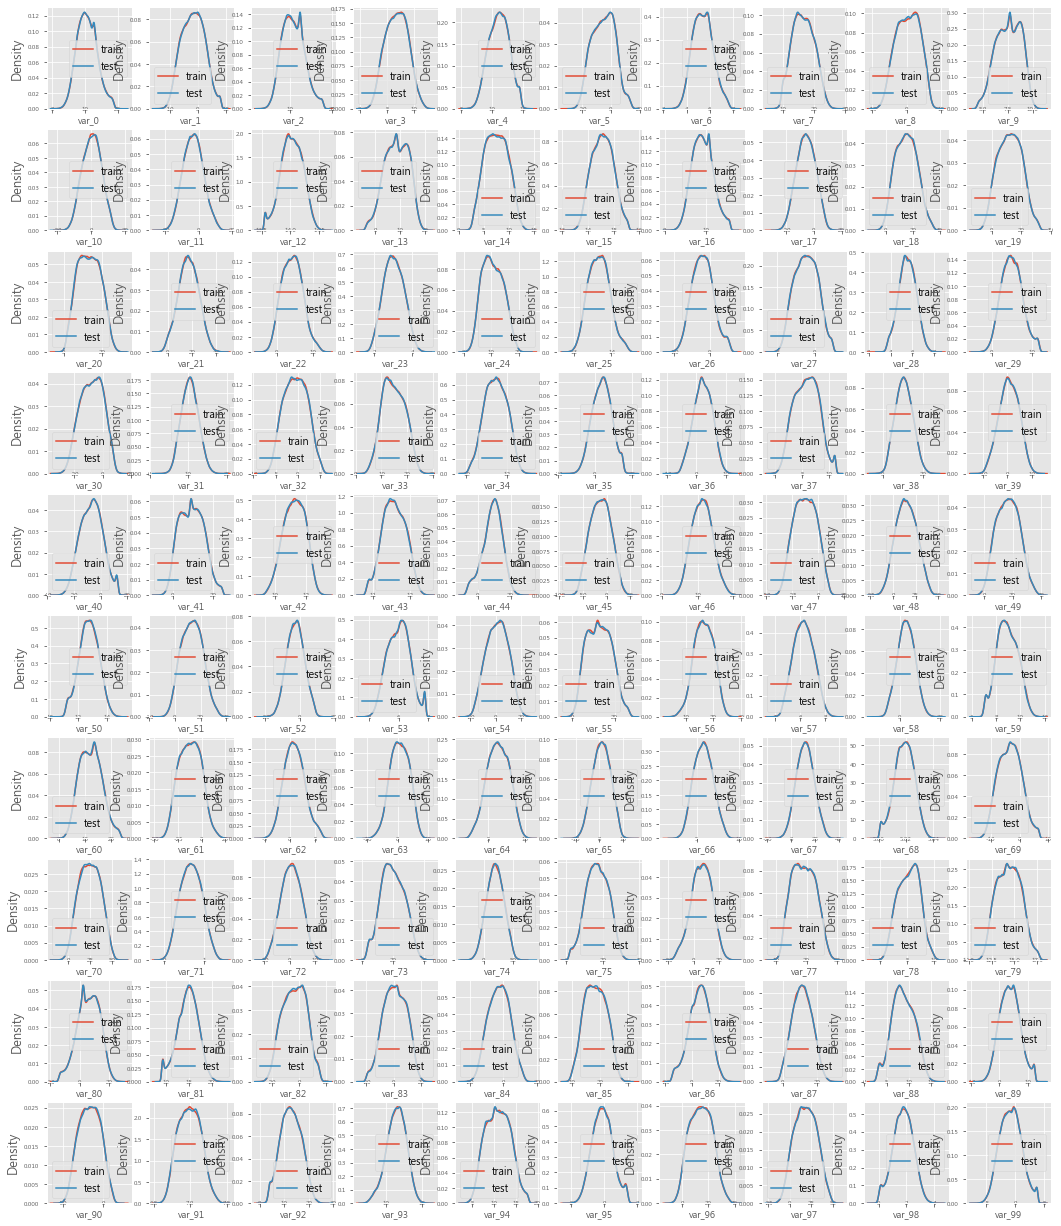

In [11]:
features = train.columns.values[2:102]

plot_feature_distribution(train, test, 'train', 'test', features)

<Figure size 432x288 with 0 Axes>

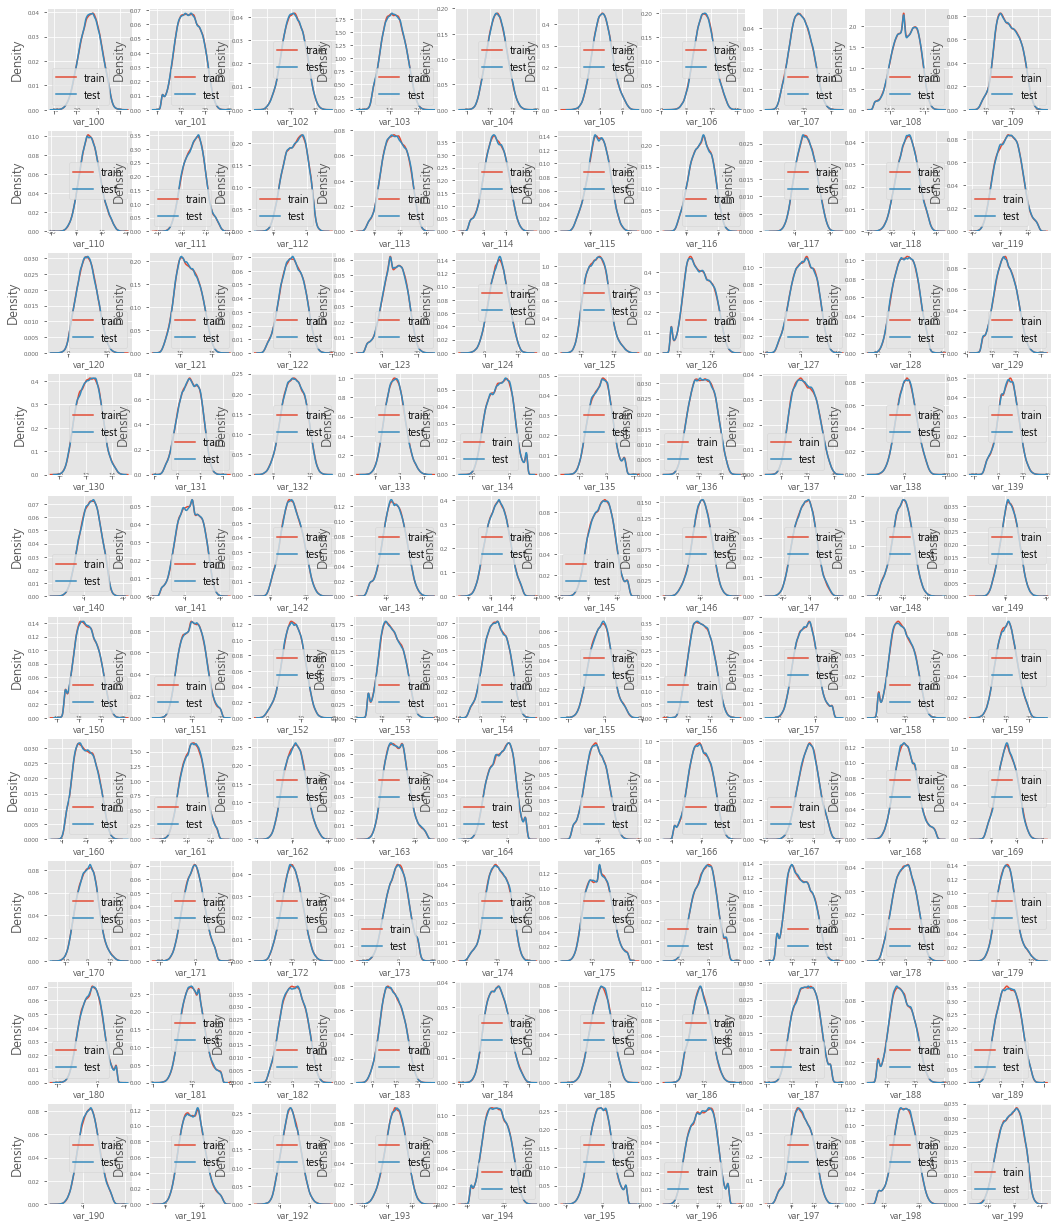

In [12]:
features = train.columns.values[102:202]

plot_feature_distribution(train, test, 'train', 'test', features)

所以變數的PDF在訓練與測試資料中都有很高的相似度。


接下來確認在訓練資料中target=0與1個變數的的PDF。

<Figure size 432x288 with 0 Axes>

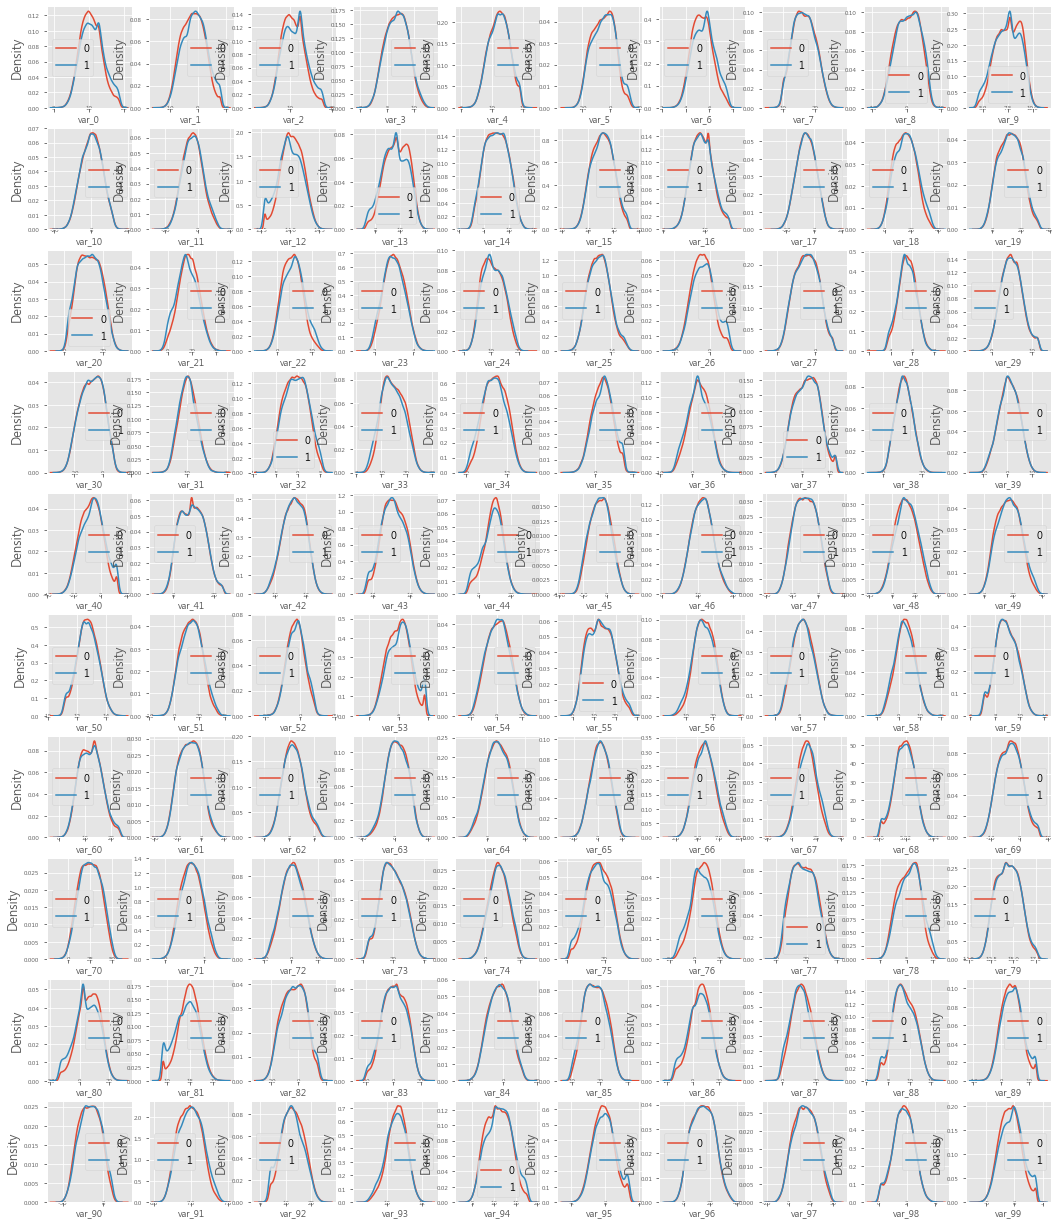

In [13]:
t0 = train.loc[train['target'] == 0]

t1 = train.loc[train['target'] == 1]

features = train.columns.values[2:102]

plot_feature_distribution(t0, t1, '0', '1', features)

<Figure size 432x288 with 0 Axes>

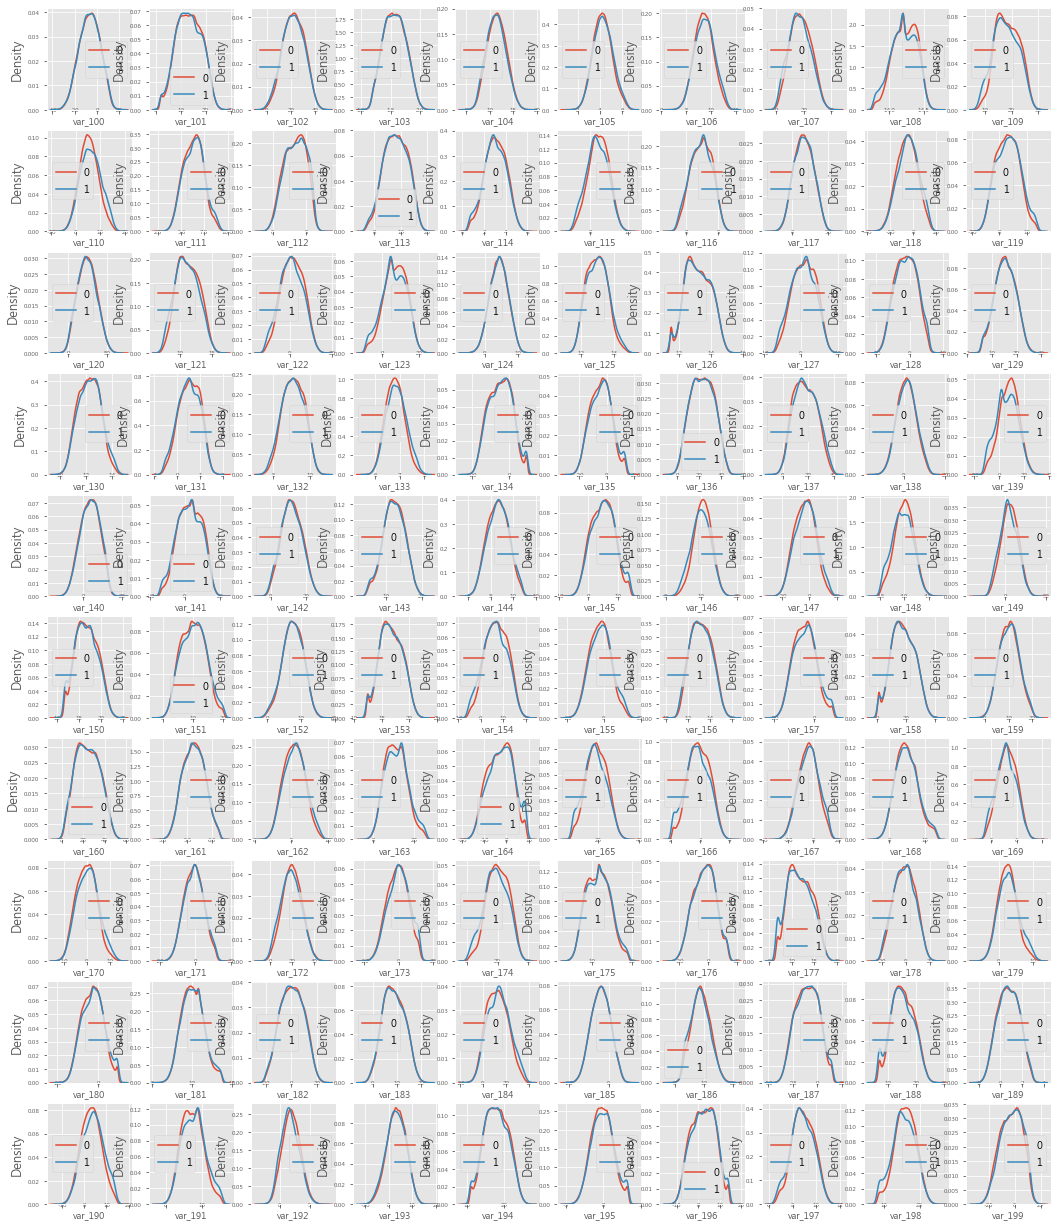

In [14]:
features = train.columns.values[102:202]

plot_feature_distribution(t0, t1, '0', '1', features)

有些變數在target=0與1中有明顯的差距，在做徵選擇時可以當作參考的依據。

# <a id='4'>Model</a>  

# **RandomForest with Under-sampling**

在訓練模型之前得先將訓練資料resample，避免不平衡資料影響模型預測結果，此次選用的resample方法為RandomUndersaampling。

從majority class中隨機選取與minority class相同數量的樣本數，選取出來的樣本再與minority class合併成新的訓練資料。在做RandomUndersaampling時須注意，由於只選取部分資料出來訓練，可能會忽略未選取資料中的重要訊息，導致模型訓練失敗。

而此次選用的機器學習方法為RandomForest，RandomForest方法為創建多棵決策樹，其中每顆樹只使用部分訓練資料與特徵進行訓練，此方法可以減少模型過擬合，屬於集成學習方法中的一種。

最後評估模型的方法為混淆矩陣，利用混淆矩陣可以觀察進階數值來評估模型，可以避免使用單一數據來評估模型。

<img src="1c8f797c139f1c1989cc2192ac22b12e.png" width:200px>


**混淆矩陣參考資料:**

**[[1]](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
[[2]](https://chih-sheng-huang821.medium.com/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%B5%B1%E8%A8%88%E6%96%B9%E6%B3%95-%E6%A8%A1%E5%9E%8B%E8%A9%95%E4%BC%B0-%E9%A9%97%E8%AD%89%E6%8C%87%E6%A8%99-b03825ff0814)
[[3]](https://kknews.cc/zh-tw/news/jlm8pm6.html)**

**Resample參考資料:**

**[[1]](https://imbalanced-learn.org/stable/references/under_sampling.html)
[[2]](https://www.796t.com/content/1543288145.html)**

In [15]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix, classification_report 

In [16]:
from imblearn.under_sampling import RandomUnderSampler 

X = train.drop(columns = ['ID_code', 'target']) 

y = train['target'] 

rus = RandomUnderSampler()

X_res, y_res = rus.fit_resample(X, y)

In [17]:
from sklearn.model_selection import train_test_split


Xres_train, Xres_test, yres_train, yres_test = train_test_split(X_res,y_res,test_size=0.3, random_state=42) 

In [18]:
rf = RandomForestClassifier(criterion = 'entropy', n_jobs = -1, oob_score=True) 

In [19]:
rf = rf.fit(Xres_train, yres_train)


rf.score(Xres_test, yres_test)

0.7480719794344473

In [20]:
rfpredictions = rf.predict(Xres_test)

rfcm = confusion_matrix(yres_test, rfpredictions, labels=rf.classes_)

In [21]:
#混集矩陣中的進階數據
print(classification_report(yres_test, rfpredictions)) 

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      6009
           1       0.75      0.74      0.75      6050

    accuracy                           0.75     12059
   macro avg       0.75      0.75      0.75     12059
weighted avg       0.75      0.75      0.75     12059



Text(0.5, 13.0, 'Predicted label')

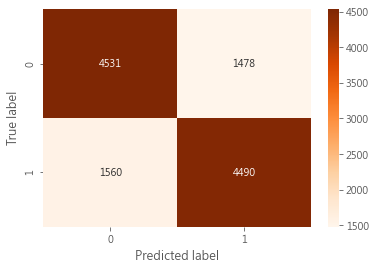

In [22]:
#將混淆矩陣視覺化
sns.heatmap(rfcm, annot=True, fmt='d', cmap='Oranges')

plt.ylabel('True label') 
plt.xlabel('Predicted label') 

此案例的問題為"是否進行特定交易"，因此設陽性為有進行交易的客戶，陰性則相反。

我利用切分來的測試資料來評估模型，其中accuracy、precision、recall、f1-score都一致的在0.74左右，表示模型有不錯的預測能力。
<br></br>
<br></br>
我只進行了簡單的resmaple，準確率從0.5上升到0.7，若改用Boosting方法且搭配模型選擇，準確率能夠在提升。

 # <a id='5'>Submission</a>

In [23]:
# sample = pd.read_csv('./sample_submission.csv')

In [24]:
# sample['target'] = rf.predict(test.drop(columns = ['ID_code']))

In [25]:
# sample.to_csv('./balancesample_submission.csv', index=False)